n_snps = 99155
mean = [0.14835643 0.14448711 0.15679895 0.14256248 0.14916981]
std = [1.35285382 1.35317582 1.43112036 1.32798098 1.36010736]


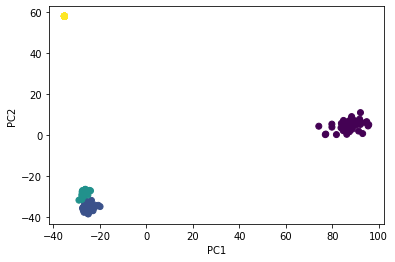

In [103]:
# imports
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import stdpopsim

n = 150 # number of diploid samples
length_multiplier = .4 # fraction of chrom length

# simulate from model
species = stdpopsim.get_species("HomSap")
contig = species.get_contig("chr22", length_multiplier=length_multiplier)
model = species.get_demographic_model("AmericanAdmixture_4B11")       
samples = model.get_samples(100, 100, 100, 100)
engine = stdpopsim.get_default_engine()
        
# generate tree sequences
ts = engine.simulate(model, contig, samples)

# generate haploid genotypes
A = ts.genotype_matrix()
p, n_hap = A.shape
print("n_snps = {}".format(p))

# generate diploid genotypes
Y = np.empty((p, int(n_hap/2)))
j = 0
for i in range(0, 2*n, 2):
    Y[:, j] = np.sum(A[:, i:(i+2)], axis=1)
    j += 1
    
# filter too rare and too common variants
f = np.sum(Y, axis=1) / (2*n)
Y_f = Y[(f<.1) | (f > .9), :]

# center / scale the data
Z = scale(Y_f.T)
mu = np.mean(Z, axis=1)
std = np.std(Z, axis=1)

# quick check the each snp has mean 0 and std 1
print("mean = {}".format(mu[:5]))
print("std = {}".format(std[:5]))

# run pca
pca = PCA(n_components=10)
PC = pca.fit_transform(Z)

# There is no discernible structure
labels = np.repeat([0, 1, 2, 4], 50)
plt.scatter(PC[:, 0], PC[:, 1], c=labels);
plt.xlabel("PC1");
plt.ylabel("PC2");